In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
 

In [2]:
tickers = ["MSFT", "AAPL", "NVDA", "AMZN", "GOOG", "META", "TSLA"]
start_date = "1981-01-01"
end_date = "2023-12-31"
price_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)[['Open','Close']]
price_data

[*********************100%***********************]  7 of 7 completed


Price             Open                                                  \
Ticker            AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
1981-01-02    0.118471         NaN         NaN         NaN         NaN   
1981-01-05    0.116325         NaN         NaN         NaN         NaN   
1981-01-06    0.111174         NaN         NaN         NaN         NaN   
1981-01-07    0.106453         NaN         NaN         NaN         NaN   
1981-01-08    0.104306         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-12-22  194.015153  153.770004  141.459996  354.226865  370.164199   
2023-12-26  192.454528  153.559998  142.305963  353.639131  371.471746   
2023-12-27  191.341219  153.559998  142.156701  354.715010  370.174108   
2023-12-28  192.981353  153.720001  141.181288  358.331174  371.838295   
2023-12-29  192.742785  153.100006  140.016804  357.623895  372.462352   

Price                                   Close                          \
Ticker           NVDA        TSLA        AAPL        AMZN        GOOG   
Date                                                                    
1981-01-02        NaN         NaN    0.118471         NaN         NaN   
1981-01-05        NaN         NaN    0.115896         NaN         NaN   
1981-01-06        NaN         NaN    0.110745         NaN         NaN   
1981-01-07        NaN         NaN    0.106023         NaN         NaN   
1981-01-08        NaN         NaN    0.103877         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-12-22  49.176533  256.760010  192.444595  153.419998  142.047211   
2023-12-26  48.949614  254.490005  191.897873  153.410004  142.146729   
2023-12-27  49.492415  258.350006  191.997269  153.339996  140.773254   
2023-12-28  49.624367  263.660004  192.424698  153.380005  140.613968   
2023-12-29  49.794301  255.100006  191.380966  151.940002  140.265625   

Price                                                      
Ticker            META        MSFT       NVDA        TSLA  
Date                                                       
1981-01-02         NaN         NaN        NaN         NaN  
1981-01-05         NaN         NaN        NaN         NaN  
1981-01-06         NaN         NaN        NaN         NaN  
1981-01-07         NaN         NaN        NaN         NaN  
1981-01-08         NaN         NaN        NaN         NaN  
...                ...         ...        ...         ...  
2023-12-22  352.045227  371.055725  48.811672  252.539993  
2023-12-26  353.479736  371.134949  49.260498  256.609985  
2023-12-27  356.468292  370.550537  49.398449  261.440002  
2023-12-28  356.956421  371.749146  49.503410  253.179993  
2023-12-29  352.613037  372.501984  49.503410  248.479996  

[10840 rows x 14 columns]

In [3]:
#RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

#Calculate RSI for each stock
rsi_data = price_data['Close'].apply(calculate_rsi)
rsi_data

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,59.246189,67.919790,74.016641,77.739009,56.647082,64.502630,64.737564
2023-12-26,49.031943,64.901866,72.181987,80.521242,52.844198,62.503430,65.298430
2023-12-27,52.291544,72.477032,70.915218,82.554059,57.639964,69.719866,67.613726


In [4]:
signals = pd.DataFrame(index=rsi_data.index, columns=rsi_data.columns)
signals[rsi_data < 25] = 'Buy'
signals[rsi_data > 75] = 'Sell'
signals[(rsi_data >= 25) & (rsi_data <= 75)] = ''  # Empty if RSI is in between
signals.to_csv('rsi_signal.csv')
 

In [5]:
#Parameters
initial_capital = 1_000_000  # Starting capital
commission = 0.001           # 0.10% per trade
slippage = 0.0002            # 0.02% market impact
min_shares = 10              # Minimum shares per trade
max_weight = 0.30            # Max 30% AUM per stock
risk_free_rate = 0.02        # 2% annual risk-free return
trading_days = 252           # Assume 252 trading days per year
rsi_period = 14              # RSI calculation period
buy_threshold = 25           # RSI buy threshold
sell_threshold = 75          # RSI sell threshold

#Initialize variables
capital = initial_capital
positions = {ticker: 0 for ticker in tickers}
portfolio_value = []
trade_log = []
rebalance_ind = False #need to liquidate some assets to buy new ones

## **Signal Logic**

### **1️. Check for Buy and Sell Signals**
- **Buy Signal** → RSI **< 25 (oversold)** **AND** we don’t already own the stock (dont buy again if stock is already in portfolio, the weights are rebalanced in later steps).
- **Sell Signal** → RSI **> 75 (overbought).**

### **2️. If There’s At Least One Buy or Sell Signal:**

---

#### **Step 1️: Rebalance if Any Stock Exceeds 30% AUM**
- **Exclude stocks that are in sell signals** (they will be fully sold in Step 2).
- **For the remaining stocks**, if any is **> 30% of total portfolio value**,  
  - Sell the excess to bring it **≤ 30%.**

---

#### **Step 2️: Process Sell Signals**
- Assume no short selling
- **Sell all shares** of any stock that has a sell signal.
- Add the **proceeds to cash**.

---

#### **Step 3️: Process Buy Signals**
##### **(A) If Enough Cash is Available**
- Buy **each stock in buy signals** so that its value **matches existing stocks**.

##### **(B) If There’s Not Enough Cash**
1. **Calculate the target value per stock**:  
   $$
   K = \frac{\text{Total Portfolio Value}}{\text{Number of Stocks (Existing + New Buys)}}
   $$
   - If **K > 30% AUM**, set **K = 30%** of total portfolio.

2. **Sell portions of existing stocks** until each reaches **K**.  
3. **Buy the new stocks at value K**.

---

#### **Step 4️: Apply Risk-Free Interest on Cash**
- Multiply **cash by**  
  $$
  \left(1 + \frac{2\%}{252} \right)
  $$
  to apply daily interest.

---



In [6]:
#each day
for date in price_data.index:
    current_prices = price_data.loc[date]
    current_rsi = rsi_data.loc[date]
    
    # Identify buy/sell signals for the day
    # buy signals (RSI < buy_threshold), but exclude stocks we already own
    buy_signals = [
        ticker for ticker in tickers 
        if pd.notna(current_rsi[ticker]) and current_rsi[ticker] < buy_threshold and positions[ticker] == 0
    ]

    sell_signals = [ticker for ticker in tickers if pd.notna(current_rsi[ticker]) and current_rsi[ticker] > sell_threshold]
    
    #If there are no buy or sell signals, skip the day
    if not buy_signals and not sell_signals:
        capital *= (1 + risk_free_rate / trading_days)  #apply daily interest to cash
        # Total portfolio value while ignoring unavaialbe stocks
        valid_tickers = [ticker for ticker in tickers if pd.notna(current_prices['Close'][ticker])]
        total_stock_value = sum(positions[ticker] * current_prices['Close'][ticker] for ticker in valid_tickers)
        total_value = capital + total_stock_value  # Cash + Stocks
        ticker_by_value = {ticker: positions[ticker] * current_prices['Close'][ticker] 
            for ticker in positions.keys() }
        portfolio_value.append({'date': date, 'value': total_value, 'cash': capital, 'positions': positions.copy(),'value by ticker':ticker_by_value })
        continue

    #print(date, 'buy:', buy_signals, 'sell:', sell_signals)


    # If there is buy or sell signal:
    # Calculate total portfolio value (ignoring non availables)
    valid_tickers = [ticker for ticker in tickers if pd.notna(current_prices['Close'][ticker])]
    total_stock_value = sum(positions[ticker] * current_prices['Close'][ticker] for ticker in valid_tickers)
    total_value = capital + total_stock_value  # Cash + Stocks

    #Step 1: Enforce 30% AUM limit (only if there is a buy or sell signal)
    for ticker in valid_tickers:
        if ticker in sell_signals:
            continue  # Skip stocks in sell signals; they will be fully sold in Step 2
        
        stock_value = positions[ticker] * current_prices['Close'][ticker]
        if stock_value / total_value > max_weight:
            excess_value = stock_value - (total_value * max_weight)
            shares_to_sell = excess_value // current_prices['Close'][ticker]
            if shares_to_sell >= min_shares:
                positions[ticker] -= shares_to_sell
                sale_proceeds = shares_to_sell * current_prices['Close'][ticker] * (1 - commission - slippage)
                capital += sale_proceeds
                trade_log.append({
                    'date': date, 'ticker': ticker, 'trade': 'exceed_limit_sell',
                    'shares': shares_to_sell, 'price': current_prices['Close'][ticker], 'total': sale_proceeds,
                    'remaining_cash': capital
                })
    
    #Step 2: Process sell signals
    for ticker in sell_signals:
        if ticker in valid_tickers and positions[ticker] > 0:
            shares_to_sell = positions[ticker] #sell all , no short selling
            sale_proceeds = shares_to_sell * current_prices['Open'][ticker] * (1 - commission - slippage)
            capital += sale_proceeds
            trade_log.append({
                'date': date, 'ticker': ticker, 'trade': 'sell',
                'shares': shares_to_sell, 'price': current_prices['Open'][ticker], 'total': sale_proceeds,
                'remaining_cash': capital
            })
            positions[ticker] = 0
    
    #Step 3: Process buy signals
    num_stocks_to_buy = len(buy_signals)

    if num_stocks_to_buy > 0:
        #Step 3.1: Calculate target allocation (K) for all stocks (including new buys)
        total_stocks = len([ticker for ticker in valid_tickers if positions[ticker] > 0]) + num_stocks_to_buy
        target_allocation = total_value / total_stocks  # Ideal equal allocation per stock

        # Ensure K does not exceed 30% AUM
        if target_allocation > total_value * max_weight:
            target_allocation = total_value * max_weight

        #Step 3.2: Check if we have enough cash to buy all buy-signal stocks at equal weight
        required_cash = sum(min(target_allocation, total_value * max_weight) for _ in buy_signals)
        
        if required_cash > capital:  # If not enough cash, rebalance by selling existing stocks
            cash_needed = required_cash - capital
            
            #sort existing stocks by highest value to sell from the most overweight ones first
            stocks_to_sell = sorted(
                [ticker for ticker in valid_tickers if positions[ticker] > 0 and ticker not in buy_signals],
                key=lambda x: positions[x] * current_prices['Close'][x],
                reverse=True
            )

            for ticker in stocks_to_sell:
                if cash_needed <= 0:
                    break  # Stop once enough cash is raised
                
                price = current_prices['Close'][ticker]
                stock_value = positions[ticker] * price
                sell_amount = min(stock_value - target_allocation, stock_value) // price  # Sell to reach equal weight
                
                if sell_amount >= min_shares:
                    positions[ticker] -= sell_amount
                    sale_proceeds = sell_amount * price * (1 - commission - slippage)
                    capital += sale_proceeds
                    cash_needed -= sale_proceeds  # Reduce cash gap
                    trade_log.append({
                        'date': date, 'ticker': ticker, 'trade': 'rebalance_sell',
                        'shares': sell_amount, 'price': price, 'total': sale_proceeds,
                        'remaining_cash': capital
                    })

        #Step 3.3: Buy stocks at target allocation K
        for ticker in buy_signals:
            if ticker not in valid_tickers:
                continue  #Skip stocks with missing prices
            
            price = current_prices['Open'][ticker]
            allocation = min(target_allocation, total_value * max_weight)  #Ensure <= 30% AUM
            shares_to_buy = allocation // price
            cost = shares_to_buy * price * (1 + commission + slippage)

            if shares_to_buy >= min_shares and cost <= capital:
                positions[ticker] += shares_to_buy
                capital -= cost
                trade_log.append({
                    'date': date, 'ticker': ticker, 'trade': 'buy',
                    'shares': shares_to_buy, 'price': price, 'total': cost,
                    'remaining_cash': capital
                })

    #Update portfolio value
    capital *= (1 + risk_free_rate / trading_days)  #daily risk-free interest on cash
    total_value = capital + sum(positions[ticker] * current_prices['Close'][ticker] for ticker in valid_tickers)
    ticker_by_value = {ticker: positions[ticker] * current_prices['Close'][ticker] 
            for ticker in positions.keys() }
    portfolio_value.append({'date': date, 'value': total_value, 'cash': capital, 'positions': positions.copy(),'value by ticker':ticker_by_value })


portfolio_df = pd.DataFrame(portfolio_value).set_index('date')
trade_log = pd.DataFrame(trade_log).set_index('date')

#print(portfolio_df['value'].iloc[-1]:,.2f})


In [8]:
trade_log.to_csv('trade_log.csv')
portfolio_df.to_csv('portfolio_value.csv')

In [9]:
portfolio_df

,value,cash,positions,value by ticker
date,,,,
1981-01-02,1.000079e+06,1.000079e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': nan, 'AAPL': 0.0, 'NVDA': nan, 'AMZN'..."
1981-01-05,1.000159e+06,1.000159e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': nan, 'AAPL': 0.0, 'NVDA': nan, 'AMZN'..."
1981-01-06,1.000238e+06,1.000238e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': nan, 'AAPL': 0.0, 'NVDA': nan, 'AMZN'..."
1981-01-07,1.000317e+06,1.000317e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': nan, 'AAPL': 0.0, 'NVDA': nan, 'AMZN'..."
1981-01-08,1.000397e+06,1.000397e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': nan, 'AAPL': 0.0, 'NVDA': nan, 'AMZN'..."
...,...,...,...,...
2023-12-22,3.087158e+06,2.523741e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': 0.0, 'AAPL': 0.0, 'NVDA': 0.0, 'AMZN'..."
2023-12-26,3.096438e+06,2.523942e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': 0.0, 'AAPL': 0.0, 'NVDA': 0.0, 'AMZN'..."
2023-12-27,3.107414e+06,2.524142e+06,"{'MSFT': 0, 'AAPL': 0, 'NVDA': 0, 'AMZN': 0, '...","{'MSFT': 0.0, 'AAPL': 0.0, 'NVDA': 0.0, 'AMZN'..."


### Evaluation Matrix

In [10]:
#returns
portfolio_df['returns'] = portfolio_df['value'].pct_change().dropna()
#total return 
total_return = (portfolio_df['value'].iloc[-1] - initial_capital) / initial_capital

#annualized return (CAGR)
num_years = (portfolio_df.index[-1] - portfolio_df.index[0]).days / 365.25
annual_return = (portfolio_df['value'].iloc[-1] / initial_capital) ** (1 / num_years) - 1

#annualized volatility
annual_volatility = portfolio_df['returns'].std() * np.sqrt(252)

#maximum drawdown
cumulative_max = portfolio_df['value'].cummax()
drawdown = (portfolio_df['value'] - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

#sharpe ratio
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility if annual_volatility > 0 else np.nan

#sortino ratio
downside_returns = portfolio_df['returns'][portfolio_df['returns'] < 0] # (downside deviation)
downside_volatility = downside_returns.std() * np.sqrt(252)
sortino_ratio = (annual_return - risk_free_rate) / downside_volatility if downside_volatility > 0 else np.nan



In [11]:
#Day of maximum drawdown
cumulative_max = portfolio_df['value'].cummax()
drawdown = (portfolio_df['value'] - cumulative_max) / cumulative_max

max_drawdown_date = drawdown.idxmin()

max_drawdown_row = portfolio_df.loc[[max_drawdown_date]]
print(max_drawdown_row)

                    value         cash  \
date                                     
2008-11-20  610737.650794  2136.860455   

                                                    positions  \
date                                                            
2008-11-20  {'MSFT': 0, 'AAPL': 63272.0, 'NVDA': 1115067.0...   

                                              value by ticker   returns  
date                                                                     
2008-11-20  {'MSFT': 0.0, 'AAPL': 153259.57825660706, 'NVD... -0.054278  


In [12]:
 
trade_log['total'] = trade_log['total'].astype(float)   
total_trades = len(trade_log)

#winning trades (sell trades with positive profit)
winning_trades = trade_log[(trade_log['trade'] == 'sell') & (trade_log['total'] > 0)]

#losing trades (sell trades with negative or zero profit)
losing_trades = trade_log[(trade_log['trade'] == 'sell') & (trade_log['total'] <= 0)]

#average return per trade
avg_return_per_trade = total_return / total_trades if total_trades > 0 else np.nan

# Win rate (percentage of sell trades that were profitable)
win_rate = len(winning_trades) / total_trades if total_trades > 0 else np.nan

# Expectancy calculation
if total_trades > 0:
    avg_win = winning_trades['total'].mean() if not winning_trades.empty else 0
    avg_loss = losing_trades['total'].mean() if not losing_trades.empty else 0
    expectancy = (win_rate * avg_win) - ((1 - win_rate) * avg_loss)
else:
    expectancy = np.nan

 

In [13]:
performance_metrics = {
    "Total Return": f"{total_return:.2%}",
    "Annual Return (CAGR)": f"{annual_return:.2%}",
    "Annual Volatility": f"{annual_volatility:.2%}",
    "Maximum Drawdown": f"{max_drawdown:.2%}",
    "Sharpe Ratio": f"{sharpe_ratio:.2f}",
    "Sortino Ratio": f"{sortino_ratio:.2f}",
    "Total Number of Trades": total_trades,
    "Average Return per Trade": f"{avg_return_per_trade:.2%}",
    "Win Rate": f"{win_rate:.2%}",
    "Expectancy": f"{expectancy:.2f}"
}

for metric, value in performance_metrics.items():
    print(f"{metric}: {value}")

Total Return: 207.89%
Annual Return (CAGR): 2.65%
Annual Volatility: 19.67%
Maximum Drawdown: -66.55%
Sharpe Ratio: 0.03
Sortino Ratio: 0.04
Total Number of Trades: 1052
Average Return per Trade: 0.20%
Win Rate: 29.75%
Expectancy: 110225.77


In [14]:
most_loss = portfolio_df['returns'].idxmin()
print(most_loss)

2020-03-16 00:00:00


In [15]:
#most profitable month
portfolio_df['month'] = portfolio_df.index.to_period('M')
monthly_returns = portfolio_df.groupby('month')['returns'].sum()


most_profitable_month = monthly_returns.idxmax()
most_profitable_month_return = monthly_returns.max()

print("\nMost Profitable Month:", most_profitable_month)
print("Monthly Return:", most_profitable_month_return)


Most Profitable Month: 2001-10
Monthly Return: 0.2719823746953999


In [16]:
#2001-10:
before = {'MSFT': 261443.96965026855, 'AAPL': 279906.6843878925, 'NVDA': 198953.42464017868, 'AMZN': 205802.2367555499}
after = {'MSFT': 284614.9600982666, 'AAPL': 324396.1786467433, 'NVDA': 318531.5310893059, 'AMZN': 304080.5079188347}
for ticker in before.keys():
    profit = after[ticker]-before[ticker]
    print(ticker,":",profit)

MSFT : 23170.990447998047
AAPL : 44489.49425885081
NVDA : 119578.1064491272
AMZN : 98278.27116328478


## Benchmark: Simple Buy and Hold strategy 

In [17]:

initial_capital = 1_000_000  
allocation_per_stock = initial_capital /7 # Equal allocation per stock

 
buy_hold_positions = {}
buy_hold_cash = 0  # No cash left after initial investment

#first available open prices (ffill ensures we get the first valid price)
first_valid_prices = price_data['Open'].ffill().iloc[0]

#Buy shares for each stock when it gets listed
for ticker in tickers:
    if pd.notna(first_valid_prices[ticker]):  #Only buy if the stock is listed
        buy_hold_positions[ticker] = allocation_per_stock // first_valid_prices[ticker]
    else:
        buy_hold_positions[ticker] = 0  #if no price available, don't buy

#track portfolio value over time
buy_hold_portfolio_value = []

for date in price_data.index:
    current_prices = price_data.loc[date, 'Close']
    
    #total value of holdings (ignoring NaNs)
    total_stock_value = sum(buy_hold_positions[ticker] * current_prices[ticker] 
                            for ticker in tickers if pd.notna(current_prices[ticker]))

    buy_hold_portfolio_value.append({'date': date, 'value': total_stock_value})
buy_hold_df = pd.DataFrame(buy_hold_portfolio_value).set_index('date')
buy_hold_df['returns'] = buy_hold_df['value'].pct_change().dropna()




                 Metric      Value
0          Total Return  22977.43%
1  Annual Return (CAGR)     13.49%
2     Annual Volatility     44.43%
3      Maximum Drawdown    -81.80%
4          Sharpe Ratio       0.26
5         Sortino Ratio       0.36


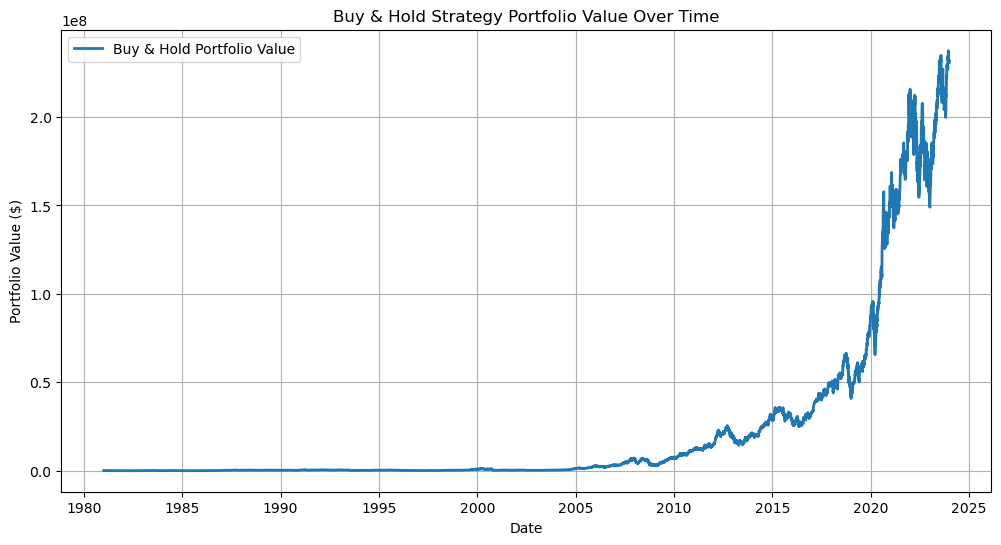

In [18]:
#total return
buy_hold_total_return = (buy_hold_df['value'].iloc[-1] - initial_capital) / initial_capital

#annualized return (CAGR)
num_years = (buy_hold_df.index[-1] - buy_hold_df.index[0]).days / 365.25
buy_hold_annual_return = (buy_hold_df['value'].iloc[-1] / initial_capital) ** (1 / num_years) - 1

#annualized volatility
buy_hold_annual_volatility = buy_hold_df['returns'].std() * np.sqrt(252)

#maximum drawdown
cumulative_max = buy_hold_df['value'].cummax()
drawdown = (buy_hold_df['value'] - cumulative_max) / cumulative_max
buy_hold_max_drawdown = drawdown.min()

#sharpe ratio
risk_free_rate = 0.02  # 2% annual risk-free return
buy_hold_sharpe_ratio = (buy_hold_annual_return - risk_free_rate) / buy_hold_annual_volatility if buy_hold_annual_volatility > 0 else np.nan

#sortino ratio (downside deviation)
downside_returns = buy_hold_df['returns'][buy_hold_df['returns'] < 0]
downside_volatility = downside_returns.std() * np.sqrt(252)
buy_hold_sortino_ratio = (buy_hold_annual_return - risk_free_rate) / downside_volatility if downside_volatility > 0 else np.nan
 




buy_hold_metrics = {
    "Total Return": f"{buy_hold_total_return:.2%}",
    "Annual Return (CAGR)": f"{buy_hold_annual_return:.2%}",
    "Annual Volatility": f"{buy_hold_annual_volatility:.2%}",
    "Maximum Drawdown": f"{buy_hold_max_drawdown:.2%}",
    "Sharpe Ratio": f"{buy_hold_sharpe_ratio:.2f}",
    "Sortino Ratio": f"{buy_hold_sortino_ratio:.2f}"
}
 
buy_hold_performance_df = pd.DataFrame(list(buy_hold_metrics.items()), columns=['Metric', 'Value'])
print(buy_hold_performance_df)
 

plt.figure(figsize=(12, 6))
plt.plot(buy_hold_df.index, buy_hold_df['value'], label="Buy & Hold Portfolio Value", linewidth=2)
plt.title("Buy & Hold Strategy Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


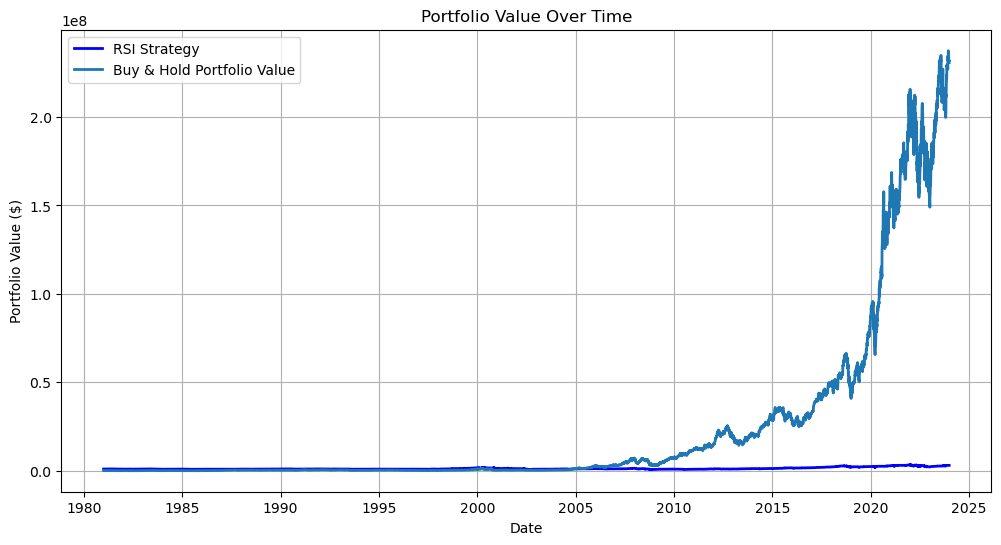

In [20]:
if 'portfolio_df' in globals():
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_df.index, portfolio_df['value'], label="RSI Strategy", linewidth=2, color='blue')
    plt.plot(buy_hold_df.index, buy_hold_df['value'], label="Buy & Hold Portfolio Value", linewidth=2)
    plt.title("Portfolio Value Over Time")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.legend()
    plt.grid()
    plt.show()
 

## S&P 500

In [21]:
sp500_ticker = "^GSPC"  # S&P 500 Index
start_date = "1981-01-01"
end_date = "2023-12-31"
initial_capital = 1_000_000  # Starting capital
risk_free_rate = 0.02  # 2% annual risk-free rate
trading_days = 252  # Assume 252 trading days per year

sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date, auto_adjust=True)[['Open', 'Close']] 
sp500_data.columns = sp500_data.columns.droplevel(1)
sp500_data

[*********************100%***********************]  1 of 1 completed


Price,Open,Close
Date,,
1981-01-02,0.000000,136.339996
1981-01-05,0.000000,137.970001
1981-01-06,0.000000,138.119995
1981-01-07,0.000000,135.080002
1981-01-08,0.000000,133.059998
...,...,...
2023-12-22,4753.919922,4754.629883
2023-12-26,4758.859863,4774.750000
2023-12-27,4773.450195,4781.580078


In [22]:
# Buy as much of the S&P 500 index as possible at the first available price
first_price = sp500_data['Close'].dropna().iloc[0]  #First available price
sp500_shares = initial_capital // first_price  # Number of S&P 500 units purchased

# Track portfolio value over time
sp500_portfolio_value = []
for date in sp500_data.index:
    current_price = sp500_data.loc[date, 'Close']
    total_value = sp500_shares * current_price  # Portfolio value based on closing prices
    sp500_portfolio_value.append({'date': date, 'value': total_value})


In [23]:


sp500_df = pd.DataFrame(sp500_portfolio_value).set_index('date')
sp500_df['returns'] = sp500_df['value'].pct_change().dropna()

# Total return
sp500_total_return = (sp500_df['value'].iloc[-1] - initial_capital) / initial_capital

# Annualized return (CAGR)
num_years = (sp500_df.index[-1] - sp500_df.index[0]).days / 365.25
sp500_annual_return = (sp500_df['value'].iloc[-1] / initial_capital) ** (1 / num_years) - 1

# Annualized volatility
sp500_annual_volatility = sp500_df['returns'].std() * np.sqrt(252)

# Maximum drawdown
cumulative_max = sp500_df['value'].cummax()
drawdown = (sp500_df['value'] - cumulative_max) / cumulative_max
sp500_max_drawdown = drawdown.min()

# Sharpe ratio
sp500_sharpe_ratio = (sp500_annual_return - risk_free_rate) / sp500_annual_volatility if sp500_annual_volatility > 0 else np.nan

# Sortino ratio (downside deviation)
downside_returns = sp500_df['returns'][sp500_df['returns'] < 0]
downside_volatility = downside_returns.std() * np.sqrt(252)
sp500_sortino_ratio = (sp500_annual_return - risk_free_rate) / downside_volatility if downside_volatility > 0 else np.nan

# Store performance metrics
sp500_metrics = {
    "Total Return": f"{sp500_total_return:.2%}",
    "Annual Return (CAGR)": f"{sp500_annual_return:.2%}",
    "Annual Volatility": f"{sp500_annual_volatility:.2%}",
    "Maximum Drawdown": f"{sp500_max_drawdown:.2%}",
    "Sharpe Ratio": f"{sp500_sharpe_ratio:.2f}",
    "Sortino Ratio": f"{sp500_sortino_ratio:.2f}"
}

# Convert to DataFrame and print results
sp500_performance_df = pd.DataFrame(list(sp500_metrics.items()), columns=['Metric', 'Value'])
print(sp500_performance_df)



                 Metric     Value
0          Total Return  3398.19%
1  Annual Return (CAGR)     8.62%
2     Annual Volatility    17.97%
3      Maximum Drawdown   -56.78%
4          Sharpe Ratio      0.37
5         Sortino Ratio      0.46


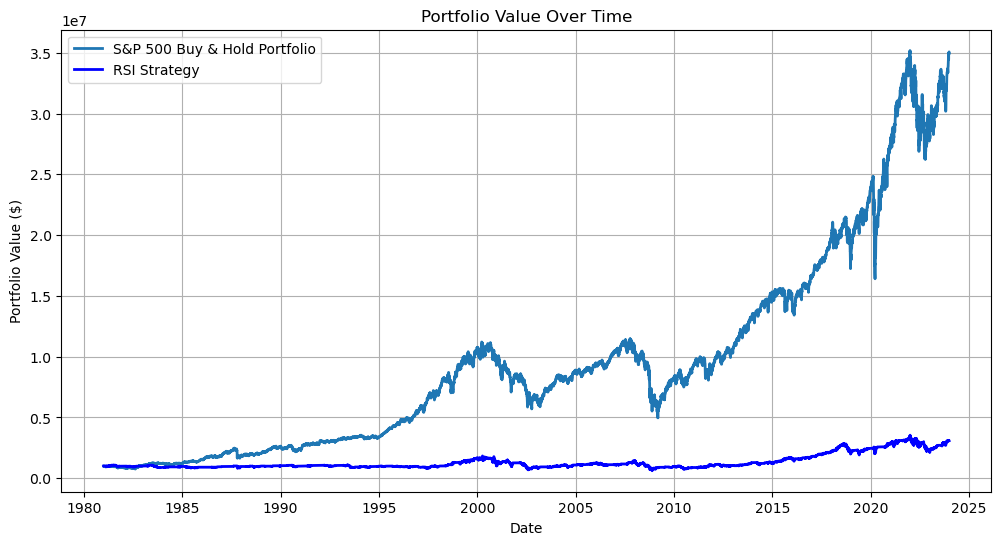

In [24]:

plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['value'], label="S&P 500 Buy & Hold Portfolio", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['value'], label="RSI Strategy", linewidth=2, color='blue')
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()